# 逻辑回归 (Logistic Regression)

## 学习目标
- 理解分类问题与回归问题的区别
- 掌握Sigmoid函数的原理和作用
- 理解逻辑回归的数学原理
- 从零实现逻辑回归算法
- 使用Scikit-learn进行分类任务
- 掌握分类模型的评估指标
- 可视化决策边界

**预计学习时间：** 2.5-3小时

---

## 1. 理论简介

### 1.1 什么是分类问题？

**回归 vs 分类：**
- **回归**：预测连续值（如房价、温度、销售额）
- **分类**：预测离散类别（如垃圾邮件/正常邮件、猫/狗、疾病诊断）

**分类类型：**
- **二分类（Binary Classification）**：两个类别（0或1，正类或负类）
- **多分类（Multi-class Classification）**：多个类别（如手写数字0-9）

---

### 1.2 为什么需要逻辑回归？

线性回归输出是连续值 $(-\infty, +\infty)$，但分类问题需要：
- 输出范围在 $[0, 1]$ 之间
- 可以解释为概率

**解决方案：** 使用Sigmoid函数将线性回归的输出映射到 $[0, 1]$ 区间

---

### 1.3 Sigmoid函数

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**性质：**
- 输出范围：$(0, 1)$
- $\sigma(0) = 0.5$
- $z \to +\infty$ 时，$\sigma(z) \to 1$
- $z \to -\infty$ 时，$\sigma(z) \to 0$
- 导数：$\sigma'(z) = \sigma(z)(1 - \sigma(z))$

---

### 1.4 逻辑回归模型

对于输入特征 $x$，逻辑回归预测为正类的概率：

$$P(y=1|x) = \sigma(w^Tx + b) = \frac{1}{1 + e^{-(w^Tx + b)}}$$

**预测规则：**
- 如果 $P(y=1|x) \geq 0.5$，预测为类别1
- 如果 $P(y=1|x) < 0.5$，预测为类别0

等价于：
- 如果 $w^Tx + b \geq 0$，预测为类别1
- 如果 $w^Tx + b < 0$，预测为类别0

---

### 1.5 损失函数：交叉熵（Cross-Entropy）

**为什么不用MSE？**
- MSE对于逻辑回归是非凸函数，梯度下降容易陷入局部最优
- 交叉熵是凸函数，保证全局最优

**单个样本的损失：**

$$L(y, \hat{y}) = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})]$$

其中 $\hat{y} = \sigma(w^Tx + b)$

**直觉理解：**
- 当真实标签 $y=1$ 时，损失为 $-\log(\hat{y})$，希望 $\hat{y}$ 接近1
- 当真实标签 $y=0$ 时，损失为 $-\log(1-\hat{y})$，希望 $\hat{y}$ 接近0

**所有样本的平均损失：**

$$J(w, b) = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]$$

---

### 1.6 梯度下降优化

**梯度计算：**

$$\frac{\partial J}{\partial w} = \frac{1}{n}X^T(\hat{y} - y)$$

$$\frac{\partial J}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i)$$

**参数更新：**

$$w := w - \alpha \frac{\partial J}{\partial w}$$

$$b := b - \alpha \frac{\partial J}{\partial b}$$

---

## 2. 导入必要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)
from sklearn.preprocessing import StandardScaler

# 设置随机种子
np.random.seed(42)

# 设置绘图风格
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['font.sans-serif'] = [
    'Arial Unicode MS',  # macOS通用
    'PingFang SC',       # macOS系统字体
    'STHeiti',           # 华文黑体
    'Heiti TC',          # 黑体-繁
    'SimHei',            # 黑体
]
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

print('✓ 所有库导入成功')

✓ 所有库导入成功


## 3. Sigmoid函数可视化

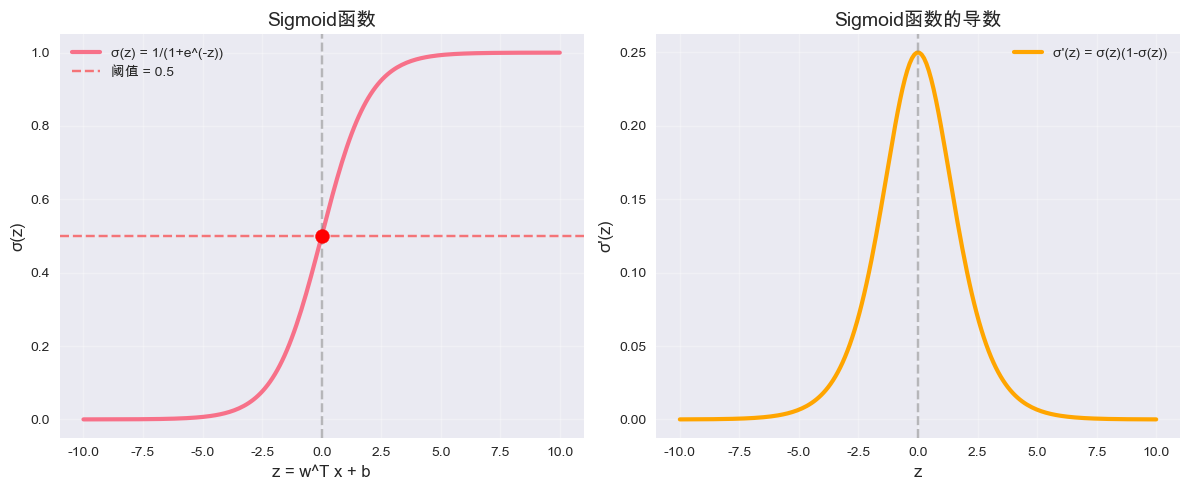


Sigmoid函数的关键值:
  σ(-5) = 0.006693 ≈ 0
  σ(-2) = 0.119203
  σ(0)  = 0.500000
  σ(2)  = 0.880797
  σ(5)  = 0.993307 ≈ 1


In [2]:
def sigmoid(z):
    """Sigmoid函数"""
    return 1 / (1 + np.exp(-z))

# 生成数据
z = np.linspace(-10, 10, 200)
y = sigmoid(z)

# 绘图
plt.figure(figsize=(12, 5))

# Sigmoid函数
plt.subplot(1, 2, 1)
plt.plot(z, y, linewidth=3, label='σ(z) = 1/(1+e^(-z))')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='阈值 = 0.5')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.scatter([0], [0.5], color='red', s=100, zorder=5)
plt.xlabel('z = w^T x + b', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.title('Sigmoid函数', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Sigmoid导数
plt.subplot(1, 2, 2)
y_derivative = y * (1 - y)
plt.plot(z, y_derivative, linewidth=3, color='orange', label="σ'(z) = σ(z)(1-σ(z))")
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('z', fontsize=12)
plt.ylabel("σ'(z)", fontsize=12)
plt.title('Sigmoid函数的导数', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

print('\nSigmoid函数的关键值:')
print(f'  σ(-5) = {sigmoid(-5):.6f} ≈ 0')
print(f'  σ(-2) = {sigmoid(-2):.6f}')
print(f'  σ(0)  = {sigmoid(0):.6f}')
print(f'  σ(2)  = {sigmoid(2):.6f}')
print(f'  σ(5)  = {sigmoid(5):.6f} ≈ 1')

## 4. 从零实现逻辑回归

### 4.1 生成二分类数据

数据形状: X=(200, 2), y=(200,)
类别分布: 类别0有100个样本, 类别1有100个样本


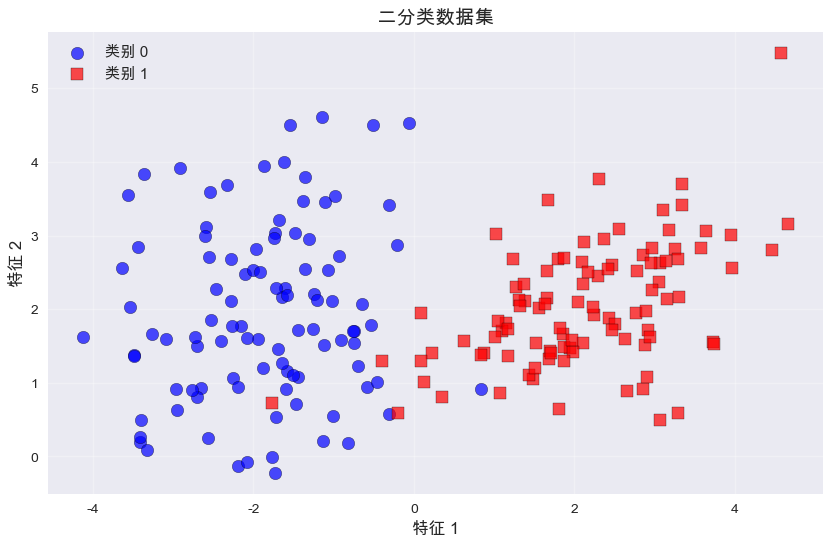

In [3]:
# 生成线性可分的二分类数据
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2,
    random_state=42
)

print(f'数据形状: X={X.shape}, y={y.shape}')
print(f'类别分布: 类别0有{np.sum(y==0)}个样本, 类别1有{np.sum(y==1)}个样本')

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], 
            c='blue', marker='o', s=80, alpha=0.7, edgecolors='k', label='类别 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], 
            c='red', marker='s', s=80, alpha=0.7, edgecolors='k', label='类别 1')
plt.xlabel('特征 1', fontsize=12)
plt.ylabel('特征 2', fontsize=12)
plt.title('二分类数据集', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

### 4.2 实现逻辑回归类

In [5]:
class LogisticRegressionFromScratch:
    """从零实现的逻辑回归"""
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
        self.losses = []  # 记录训练过程中的损失
    
    def sigmoid(self, z):
        """Sigmoid激活函数"""
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y_true, y_pred):
        """计算交叉熵损失"""
        # 避免log(0)的情况
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y):
        """训练模型"""
        n_samples, n_features = X.shape
        
        # 初始化参数
        self.w = np.zeros(n_features)
        self.b = 0
        
        # 梯度下降
        for i in range(self.n_iterations):
            # 前向传播
            linear_output = X @ self.w + self.b
            y_pred = self.sigmoid(linear_output)
            
            # 计算损失
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)
            
            # 计算梯度
            dw = (1 / n_samples) * X.T @ (y_pred - y)
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # 更新参数
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
            # 每100次迭代打印一次
            if (i + 1) % 100 == 0:
                accuracy = np.mean((y_pred >= 0.5) == y)
                print(f'Iteration {i+1}/{self.n_iterations}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
        
        return self
    
    def predict_proba(self, X):
        """预测概率"""
        linear_output = X @ self.w + self.b
        return self.sigmoid(linear_output)
    
    def predict(self, X, threshold=0.5):
        """预测类别"""
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)

### 4.3 训练模型

In [6]:
# 训练模型
model_scratch = LogisticRegressionFromScratch(learning_rate=0.1, n_iterations=1000)
model_scratch.fit(X, y)

print(f'\n学到的参数:')
print(f'  w = {model_scratch.w}')
print(f'  b = {model_scratch.b:.4f}')

# 预测
y_pred = model_scratch.predict(X)
y_pred_proba = model_scratch.predict_proba(X)

accuracy = np.mean(y_pred == y)
print(f'\n训练集准确率: {accuracy:.4f}')

Iteration 100/1000, Loss: 0.1117, Accuracy: 0.9750
Iteration 200/1000, Loss: 0.0959, Accuracy: 0.9750
Iteration 300/1000, Loss: 0.0904, Accuracy: 0.9800
Iteration 400/1000, Loss: 0.0875, Accuracy: 0.9800
Iteration 500/1000, Loss: 0.0858, Accuracy: 0.9800
Iteration 600/1000, Loss: 0.0847, Accuracy: 0.9800
Iteration 700/1000, Loss: 0.0838, Accuracy: 0.9800
Iteration 800/1000, Loss: 0.0832, Accuracy: 0.9800
Iteration 900/1000, Loss: 0.0826, Accuracy: 0.9800
Iteration 1000/1000, Loss: 0.0822, Accuracy: 0.9800

学到的参数:
  w = [ 2.86720606 -0.36822957]
  b = 0.5878

训练集准确率: 0.9800


### 4.4 可视化训练过程

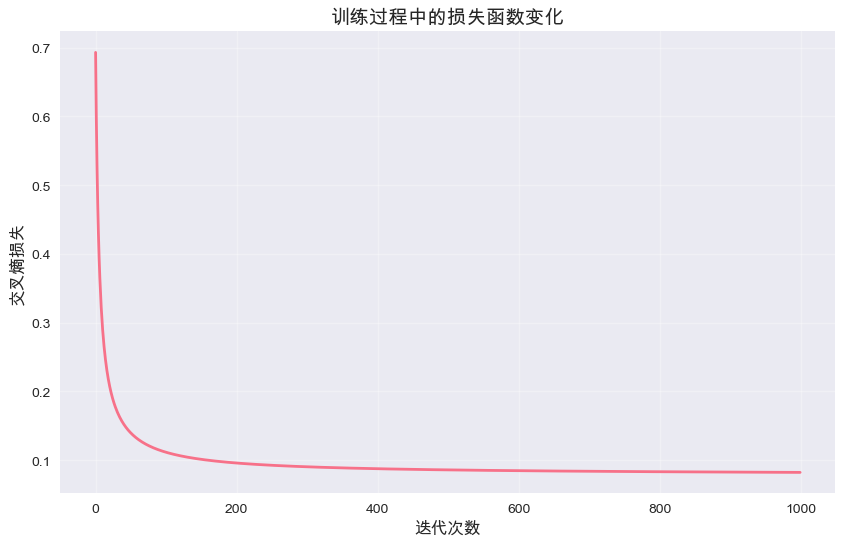

In [7]:
# 绘制损失函数下降曲线
plt.figure(figsize=(10, 6))
plt.plot(model_scratch.losses, linewidth=2)
plt.xlabel('迭代次数', fontsize=12)
plt.ylabel('交叉熵损失', fontsize=12)
plt.title('训练过程中的损失函数变化', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

### 4.5 可视化决策边界

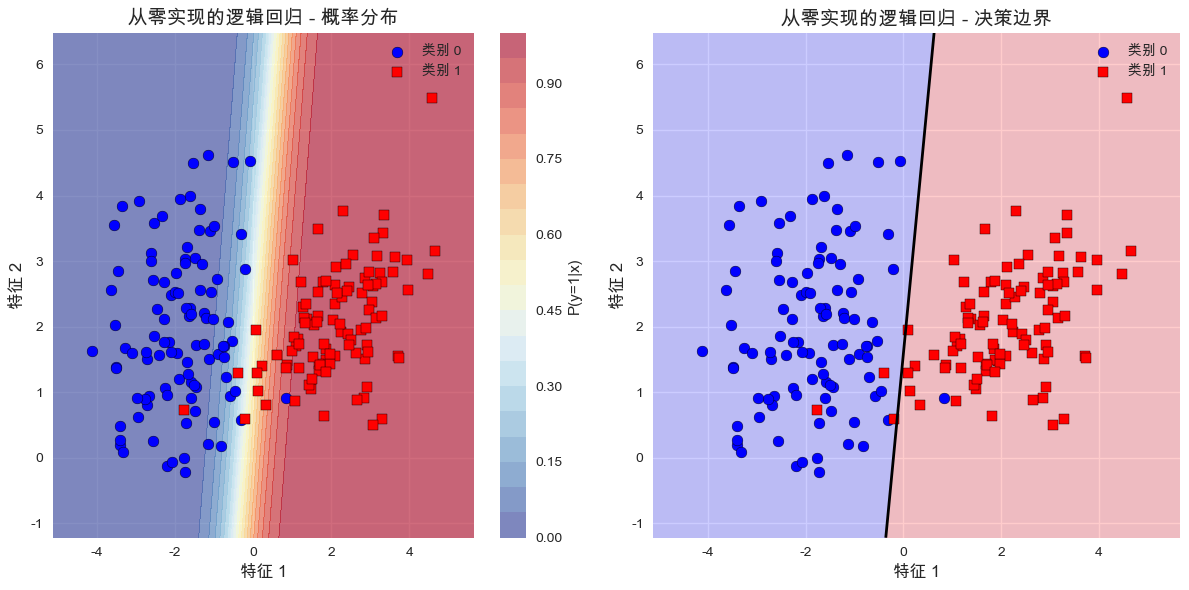

In [8]:
def plot_decision_boundary(model, X, y, title='决策边界'):
    """绘制决策边界"""
    # 创建网格
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # 预测网格点的概率
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘图
    plt.figure(figsize=(12, 6))
    
    # 左图：概率热图
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
    plt.colorbar(label='P(y=1|x)')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], 
                c='blue', marker='o', s=60, edgecolors='k', label='类别 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], 
                c='red', marker='s', s=60, edgecolors='k', label='类别 1')
    plt.xlabel('特征 1', fontsize=12)
    plt.ylabel('特征 2', fontsize=12)
    plt.title(f'{title} - 概率分布', fontsize=14)
    plt.legend(fontsize=10)
    
    # 右图：决策边界
    plt.subplot(1, 2, 2)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.2)
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], 
                c='blue', marker='o', s=60, edgecolors='k', label='类别 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], 
                c='red', marker='s', s=60, edgecolors='k', label='类别 1')
    plt.xlabel('特征 1', fontsize=12)
    plt.ylabel('特征 2', fontsize=12)
    plt.title(f'{title} - 决策边界', fontsize=14)
    plt.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()

# 绘制决策边界
plot_decision_boundary(model_scratch, X, y, title='从零实现的逻辑回归')

## 5. 使用Scikit-learn

### 5.1 LogisticRegression API详解

In [9]:
# 创建逻辑回归模型
model_sklearn = LogisticRegression(
    penalty='l2',        # 正则化类型: 'l1', 'l2', 'elasticnet', 'none'
    C=1.0,               # 正则化强度的倒数（C越小，正则化越强）
    solver='lbfgs',      # 优化算法: 'lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'
    max_iter=1000,       # 最大迭代次数
    random_state=42
)

# 训练模型
model_sklearn.fit(X, y)

print('Scikit-learn逻辑回归模型参数:')
print(f'  w (系数) = {model_sklearn.coef_[0]}')
print(f'  b (截距) = {model_sklearn.intercept_[0]:.4f}')

# 预测
y_pred_sklearn = model_sklearn.predict(X)
y_pred_proba_sklearn = model_sklearn.predict_proba(X)

accuracy_sklearn = accuracy_score(y, y_pred_sklearn)
print(f'\n训练集准确率: {accuracy_sklearn:.4f}')

# 查看前5个样本的预测概率
print('\n前5个样本的预测概率:')
print('样本\t真实标签\t预测标签\tP(y=0)\t\tP(y=1)')
print('-' * 60)
for i in range(5):
    print(f'{i}\t{y[i]}\t\t{y_pred_sklearn[i]}\t\t{y_pred_proba_sklearn[i][0]:.4f}\t\t{y_pred_proba_sklearn[i][1]:.4f}')

Scikit-learn逻辑回归模型参数:
  w (系数) = [ 2.52973598 -0.57491818]
  b (截距) = 1.0428

训练集准确率: 0.9850

前5个样本的预测概率:
样本	真实标签	预测标签	P(y=0)		P(y=1)
------------------------------------------------------------
0	1		1		0.3139		0.6861
1	1		1		0.0088		0.9912
2	1		1		0.0005		0.9995
3	1		1		0.0001		0.9999
4	1		1		0.0060		0.9940


### 5.2 对比从零实现和Sklearn实现

In [10]:
print('参数对比:')
print(f'从零实现: w = {model_scratch.w}, b = {model_scratch.b:.4f}')
print(f'Scikit-learn: w = {model_sklearn.coef_[0]}, b = {model_sklearn.intercept_[0]:.4f}')
print(f'\n准确率对比:')
print(f'从零实现: {accuracy:.4f}')
print(f'Scikit-learn: {accuracy_sklearn:.4f}')

参数对比:
从零实现: w = [ 2.86720606 -0.36822957], b = 0.5878
Scikit-learn: w = [ 2.52973598 -0.57491818], b = 1.0428

准确率对比:
从零实现: 0.9800
Scikit-learn: 0.9850


### 5.3 参数详解

#### C参数（正则化强度）

C是正则化强度的**倒数**：
- C越大 → 正则化越弱 → 模型越复杂 → 容易过拟合
- C越小 → 正则化越强 → 模型越简单 → 容易欠拟合

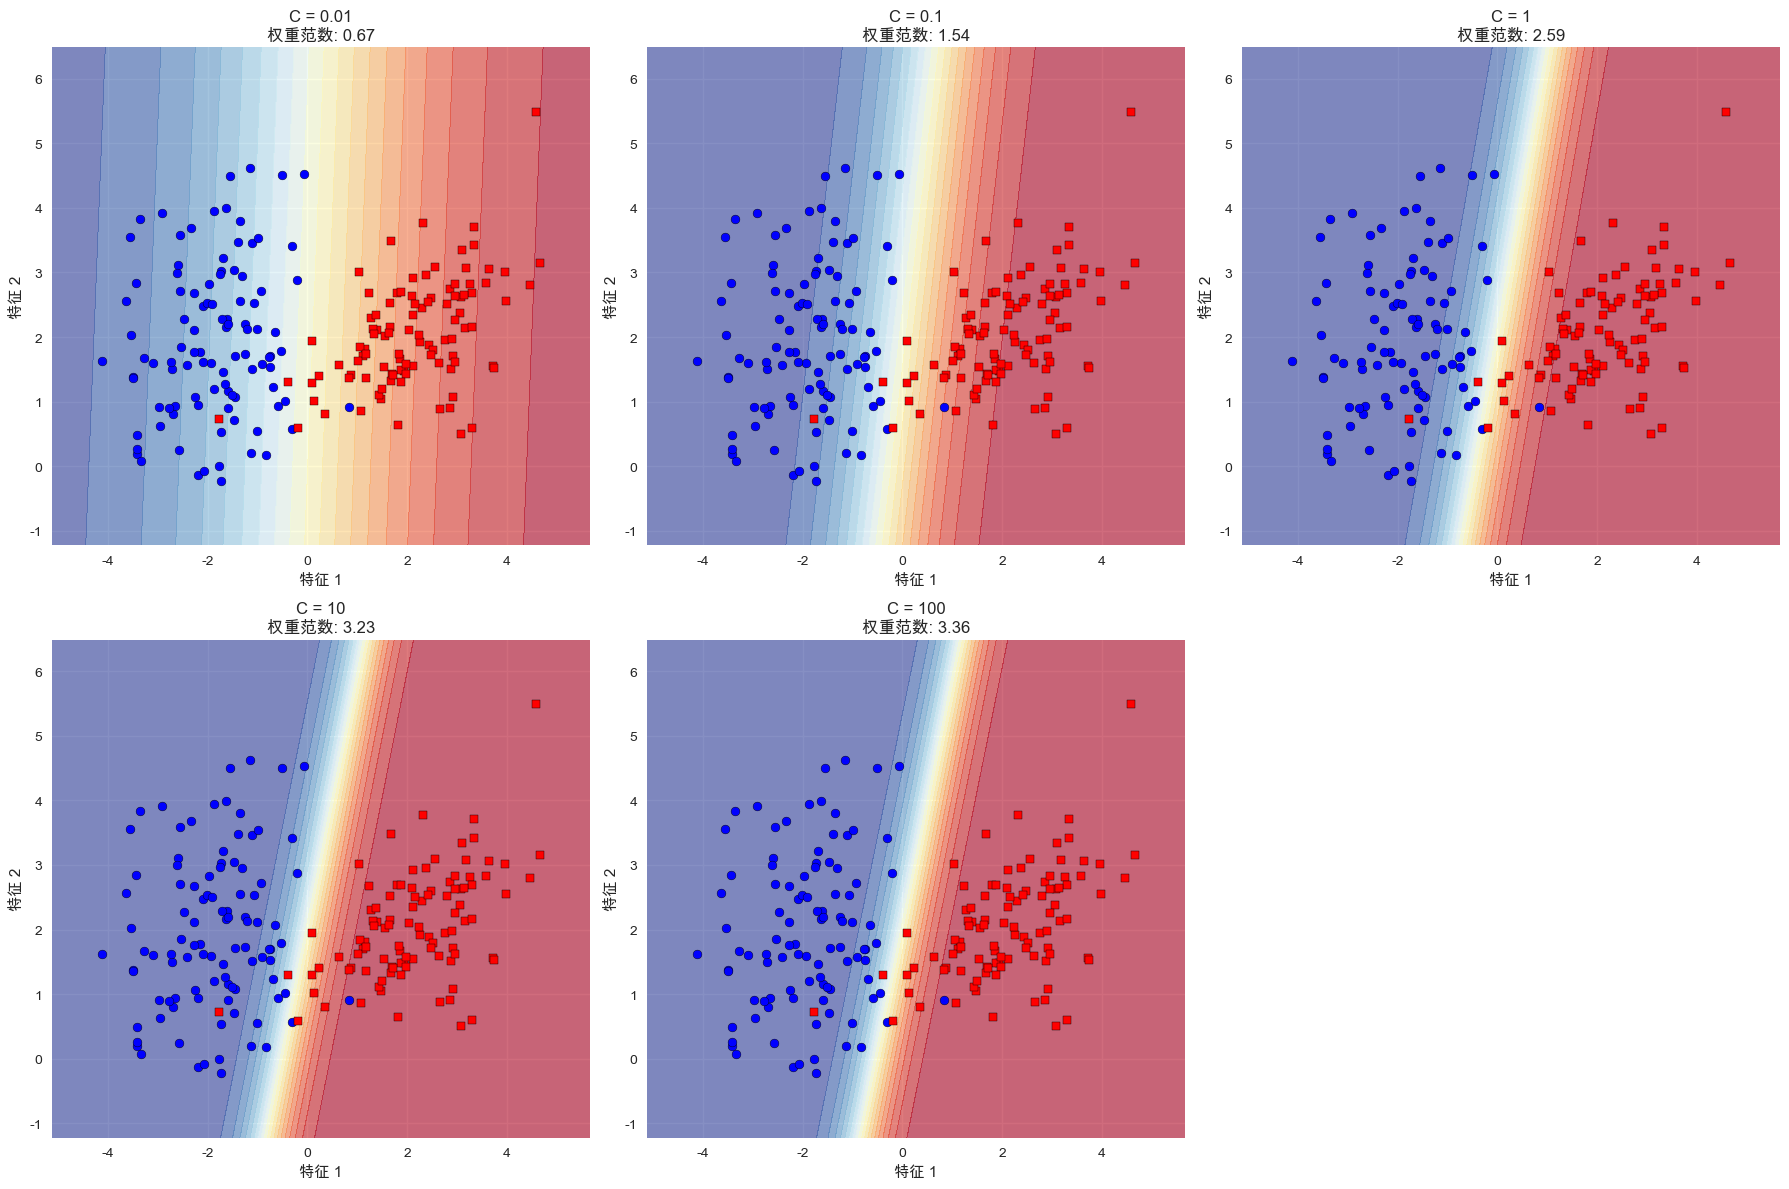

In [11]:
# 测试不同的C值
C_values = [0.01, 0.1, 1, 10, 100]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, C in enumerate(C_values):
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X, y)
    
    # 创建网格
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # 绘图
    axes[i].contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
    axes[i].scatter(X[y==0][:, 0], X[y==0][:, 1], 
                    c='blue', marker='o', s=40, edgecolors='k')
    axes[i].scatter(X[y==1][:, 0], X[y==1][:, 1], 
                    c='red', marker='s', s=40, edgecolors='k')
    axes[i].set_title(f'C = {C}\n权重范数: {np.linalg.norm(model.coef_):.2f}', fontsize=12)
    axes[i].set_xlabel('特征 1')
    axes[i].set_ylabel('特征 2')

# 删除多余的子图
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

#### Solver参数（优化算法）

| Solver | 适用场景 | 支持的penalty |
|--------|---------|---------------|
| `lbfgs` | 小数据集，默认选择 | l2, none |
| `liblinear` | 小数据集，支持L1 | l1, l2 |
| `sag` / `saga` | 大数据集（>10,000样本） | l1, l2, elasticnet |
| `newton-cg` | 大数据集 | l2, none |

## 6. 分类评估指标

### 6.1 准确率（Accuracy）

$$Accuracy = \frac{正确预测的样本数}{总样本数} = \frac{TP + TN}{TP + TN + FP + FN}$$

**局限性：** 在类别不平衡的数据集上，准确率可能具有误导性。

In [12]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 训练模型
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 计算准确率
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'训练集准确率: {train_accuracy:.4f}')
print(f'测试集准确率: {test_accuracy:.4f}')

训练集准确率: 0.9812
测试集准确率: 1.0000


### 6.2 混淆矩阵（Confusion Matrix）

混淆矩阵展示了预测结果的详细分布：

|  | 预测为负类 | 预测为正类 |
|---|-----------|----------|
| **实际为负类** | TN (真负类) | FP (假正类) |
| **实际为正类** | FN (假负类) | TP (真正类) |

- **TP (True Positive)**: 真正类，实际为1，预测也为1
- **TN (True Negative)**: 真负类，实际为0，预测也为0
- **FP (False Positive)**: 假正类，实际为0，预测为1（**第一类错误**）
- **FN (False Negative)**: 假负类，实际为1，预测为0（**第二类错误**）

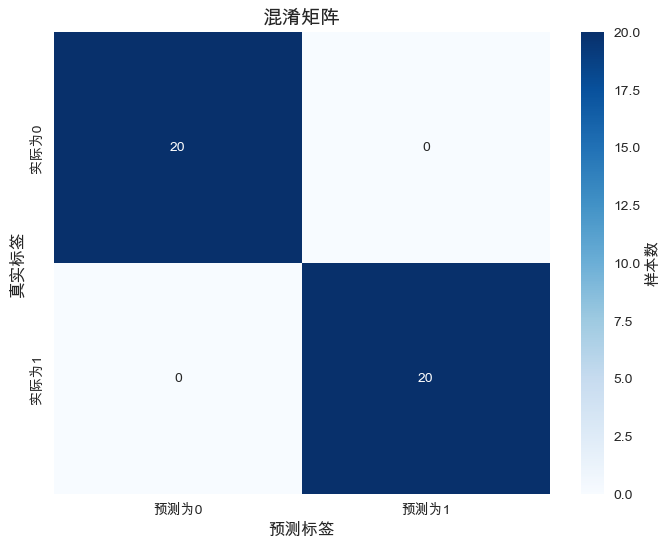

混淆矩阵详解:
  TN (真负类): 20 - 实际为0，预测也为0 ✓
  FP (假正类): 0 - 实际为0，预测为1 ✗ (第一类错误)
  FN (假负类): 0 - 实际为1，预测为0 ✗ (第二类错误)
  TP (真正类): 20 - 实际为1，预测也为1 ✓


In [13]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_test_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['预测为0', '预测为1'],
            yticklabels=['实际为0', '实际为1'],
            cbar_kws={'label': '样本数'})
plt.ylabel('真实标签', fontsize=12)
plt.xlabel('预测标签', fontsize=12)
plt.title('混淆矩阵', fontsize=14)
plt.show()

# 提取混淆矩阵的值
tn, fp, fn, tp = cm.ravel()

print('混淆矩阵详解:')
print(f'  TN (真负类): {tn} - 实际为0，预测也为0 ✓')
print(f'  FP (假正类): {fp} - 实际为0，预测为1 ✗ (第一类错误)')
print(f'  FN (假负类): {fn} - 实际为1，预测为0 ✗ (第二类错误)')
print(f'  TP (真正类): {tp} - 实际为1，预测也为1 ✓')

### 6.3 精确率、召回率、F1分数

#### 精确率（Precision）

$$Precision = \frac{TP}{TP + FP}$$

**含义：** 在所有预测为正类的样本中，真正为正类的比例。

**适用场景：** 当假正类的代价很高时（如垃圾邮件检测，不希望误判正常邮件）。

---

#### 召回率（Recall / Sensitivity / True Positive Rate）

$$Recall = \frac{TP}{TP + FN}$$

**含义：** 在所有真正为正类的样本中，被正确预测的比例。

**适用场景：** 当假负类的代价很高时（如癌症诊断，不希望漏诊）。

---

#### F1分数（F1-Score）

$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

**含义：** 精确率和召回率的调和平均数，综合评估指标。

In [14]:
# 计算各项指标
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# 手动计算（验证）
precision_manual = tp / (tp + fp)
recall_manual = tp / (tp + fn)
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)

print('评估指标:')
print(f'  准确率 (Accuracy):  {test_accuracy:.4f}')
print(f'  精确率 (Precision): {precision:.4f} (手动计算: {precision_manual:.4f})')
print(f'  召回率 (Recall):    {recall:.4f} (手动计算: {recall_manual:.4f})')
print(f'  F1分数 (F1-Score):  {f1:.4f} (手动计算: {f1_manual:.4f})')

print('\n公式验证:')
print(f'  Precision = TP/(TP+FP) = {tp}/({tp}+{fp}) = {precision_manual:.4f}')
print(f'  Recall = TP/(TP+FN) = {tp}/({tp}+{fn}) = {recall_manual:.4f}')
print(f'  F1 = 2×(P×R)/(P+R) = 2×({precision_manual:.4f}×{recall_manual:.4f})/({precision_manual:.4f}+{recall_manual:.4f}) = {f1_manual:.4f}')

评估指标:
  准确率 (Accuracy):  1.0000
  精确率 (Precision): 1.0000 (手动计算: 1.0000)
  召回率 (Recall):    1.0000 (手动计算: 1.0000)
  F1分数 (F1-Score):  1.0000 (手动计算: 1.0000)

公式验证:
  Precision = TP/(TP+FP) = 20/(20+0) = 1.0000
  Recall = TP/(TP+FN) = 20/(20+0) = 1.0000
  F1 = 2×(P×R)/(P+R) = 2×(1.0000×1.0000)/(1.0000+1.0000) = 1.0000


### 6.4 分类报告（Classification Report）

In [15]:
# 生成分类报告
report = classification_report(y_test, y_test_pred, target_names=['类别 0', '类别 1'])
print('分类报告:')
print(report)

print('\n分类报告解读:')
print('  - precision: 精确率')
print('  - recall: 召回率')
print('  - f1-score: F1分数')
print('  - support: 该类别的样本数量')
print('  - macro avg: 各类别指标的简单平均（不考虑样本数量）')
print('  - weighted avg: 各类别指标的加权平均（按样本数量加权）')

分类报告:
              precision    recall  f1-score   support

        类别 0       1.00      1.00      1.00        20
        类别 1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


分类报告解读:
  - precision: 精确率
  - recall: 召回率
  - f1-score: F1分数
  - support: 该类别的样本数量
  - macro avg: 各类别指标的简单平均（不考虑样本数量）
  - weighted avg: 各类别指标的加权平均（按样本数量加权）


## 7. 实战练习

### 7.1 数据集1: Iris鸢尾花数据集（二分类）

Iris数据集（二分类）:
  样本数量: 100
  特征数量: 2
  特征名称: ['sepal length (cm)', 'sepal width (cm)']
  类别分布: Setosa=50, Versicolor=50


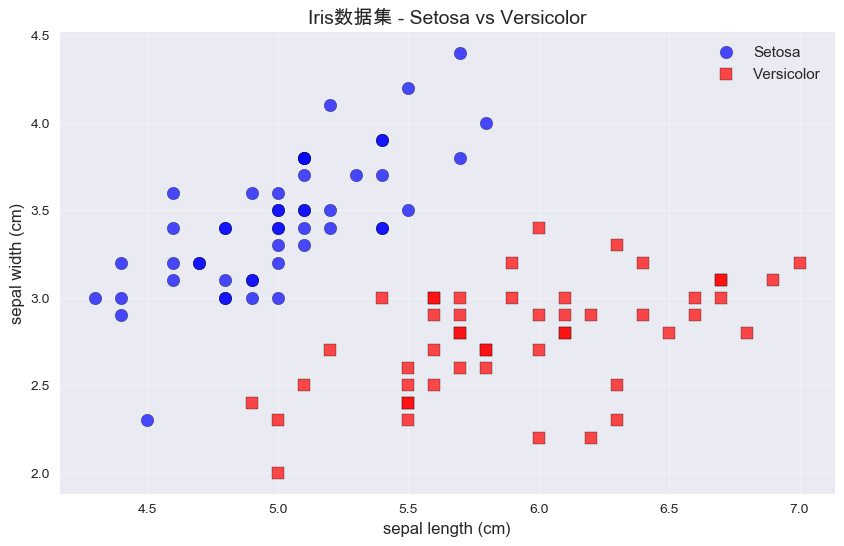

In [16]:
# 加载Iris数据集
iris = load_iris()
# 只使用前两个类别（Setosa和Versicolor）
X_iris = iris.data[iris.target != 2][:, :2]  # 只使用前两个特征便于可视化
y_iris = iris.target[iris.target != 2]

print('Iris数据集（二分类）:')
print(f'  样本数量: {len(X_iris)}')
print(f'  特征数量: {X_iris.shape[1]}')
print(f'  特征名称: {iris.feature_names[:2]}')
print(f'  类别分布: Setosa={np.sum(y_iris==0)}, Versicolor={np.sum(y_iris==1)}')

# 可视化数据
plt.figure(figsize=(10, 6))
plt.scatter(X_iris[y_iris==0][:, 0], X_iris[y_iris==0][:, 1], 
            c='blue', marker='o', s=80, alpha=0.7, edgecolors='k', label='Setosa')
plt.scatter(X_iris[y_iris==1][:, 0], X_iris[y_iris==1][:, 1], 
            c='red', marker='s', s=80, alpha=0.7, edgecolors='k', label='Versicolor')
plt.xlabel(iris.feature_names[0], fontsize=12)
plt.ylabel(iris.feature_names[1], fontsize=12)
plt.title('Iris数据集 - Setosa vs Versicolor', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

In [17]:
# 划分数据集
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

# 训练逻辑回归模型
model_iris = LogisticRegression(random_state=42)
model_iris.fit(X_train_iris, y_train_iris)

# 预测
y_train_pred_iris = model_iris.predict(X_train_iris)
y_test_pred_iris = model_iris.predict(X_test_iris)

# 评估
print('Iris数据集评估结果:')
print(f'  训练集准确率: {accuracy_score(y_train_iris, y_train_pred_iris):.4f}')
print(f'  测试集准确率: {accuracy_score(y_test_iris, y_test_pred_iris):.4f}')
print(f'\n测试集分类报告:')
print(classification_report(y_test_iris, y_test_pred_iris, 
                          target_names=['Setosa', 'Versicolor']))

Iris数据集评估结果:
  训练集准确率: 1.0000
  测试集准确率: 1.0000

测试集分类报告:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



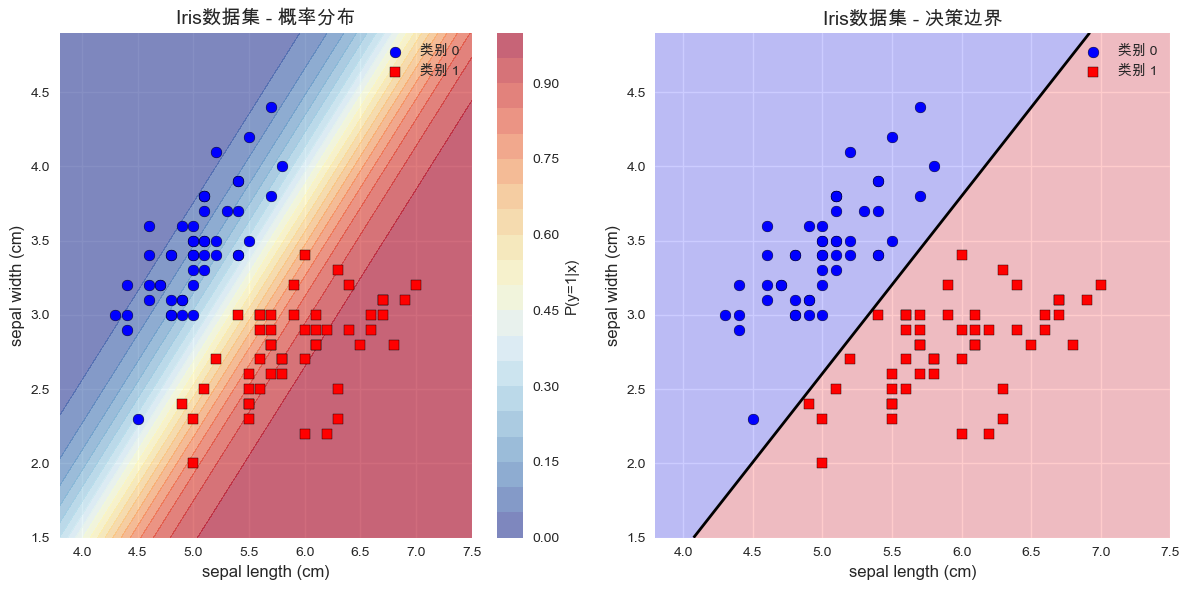

In [18]:
# 可视化决策边界
def plot_decision_boundary_sklearn(model, X, y, title='决策边界', feature_names=None):
    """绘制sklearn模型的决策边界"""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12, 6))
    
    # 左图：概率热图
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
    plt.colorbar(label='P(y=1|x)')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], 
                c='blue', marker='o', s=60, edgecolors='k', label='类别 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], 
                c='red', marker='s', s=60, edgecolors='k', label='类别 1')
    plt.xlabel(feature_names[0] if feature_names else '特征 1', fontsize=12)
    plt.ylabel(feature_names[1] if feature_names else '特征 2', fontsize=12)
    plt.title(f'{title} - 概率分布', fontsize=14)
    plt.legend(fontsize=10)
    
    # 右图：决策边界
    plt.subplot(1, 2, 2)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.2)
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], 
                c='blue', marker='o', s=60, edgecolors='k', label='类别 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], 
                c='red', marker='s', s=60, edgecolors='k', label='类别 1')
    plt.xlabel(feature_names[0] if feature_names else '特征 1', fontsize=12)
    plt.ylabel(feature_names[1] if feature_names else '特征 2', fontsize=12)
    plt.title(f'{title} - 决策边界', fontsize=14)
    plt.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_decision_boundary_sklearn(model_iris, X_iris, y_iris, 
                              title='Iris数据集',
                              feature_names=iris.feature_names[:2])

### 7.2 数据集2: Breast Cancer（乳腺癌诊断）

In [19]:
# 加载乳腺癌数据集
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print('Breast Cancer数据集:')
print(f'  样本数量: {len(X_cancer)}')
print(f'  特征数量: {X_cancer.shape[1]}')
print(f'  类别: {cancer.target_names}')
print(f'  类别分布: 恶性(0)={np.sum(y_cancer==0)}, 良性(1)={np.sum(y_cancer==1)}')
print(f'\n前5个特征: {cancer.feature_names[:5]}')

Breast Cancer数据集:
  样本数量: 569
  特征数量: 30
  类别: ['malignant' 'benign']
  类别分布: 恶性(0)=212, 良性(1)=357

前5个特征: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


In [20]:
# 划分数据集
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# 特征标准化（重要！）
scaler = StandardScaler()
X_train_cancer_scaled = scaler.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler.transform(X_test_cancer)

# 训练逻辑回归模型
model_cancer = LogisticRegression(max_iter=10000, random_state=42)
model_cancer.fit(X_train_cancer_scaled, y_train_cancer)

# 预测
y_train_pred_cancer = model_cancer.predict(X_train_cancer_scaled)
y_test_pred_cancer = model_cancer.predict(X_test_cancer_scaled)

# 评估
print('Breast Cancer数据集评估结果:')
print(f'  训练集准确率: {accuracy_score(y_train_cancer, y_train_pred_cancer):.4f}')
print(f'  测试集准确率: {accuracy_score(y_test_cancer, y_test_pred_cancer):.4f}')

print(f'\n测试集详细评估:')
print(classification_report(y_test_cancer, y_test_pred_cancer, 
                          target_names=cancer.target_names))

Breast Cancer数据集评估结果:
  训练集准确率: 0.9890
  测试集准确率: 0.9825

测试集详细评估:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



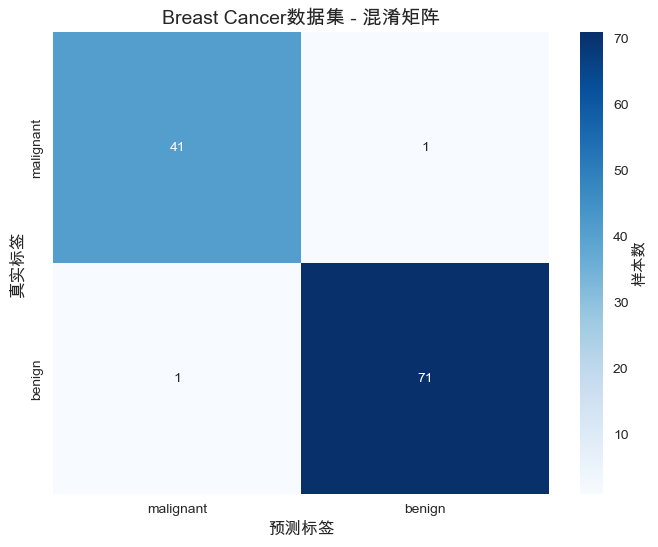


误诊分析:
  假阳性(FP): 1个 - 实际为恶性，误诊为良性（严重！）
  假阴性(FN): 1个 - 实际为良性，误诊为恶性（需进一步检查）

在医疗诊断中，假阴性(FN)的代价通常更高，因为会漏诊癌症患者。


In [21]:
# 混淆矩阵可视化
cm_cancer = confusion_matrix(y_test_cancer, y_test_pred_cancer)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_cancer, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names,
            cbar_kws={'label': '样本数'})
plt.ylabel('真实标签', fontsize=12)
plt.xlabel('预测标签', fontsize=12)
plt.title('Breast Cancer数据集 - 混淆矩阵', fontsize=14)
plt.show()

# 分析误诊情况
tn, fp, fn, tp = cm_cancer.ravel()
print('\n误诊分析:')
print(f'  假阳性(FP): {fp}个 - 实际为恶性，误诊为良性（严重！）')
print(f'  假阴性(FN): {fn}个 - 实际为良性，误诊为恶性（需进一步检查）')
print(f'\n在医疗诊断中，假阴性(FN)的代价通常更高，因为会漏诊癌症患者。')

### 7.3 特征重要性分析

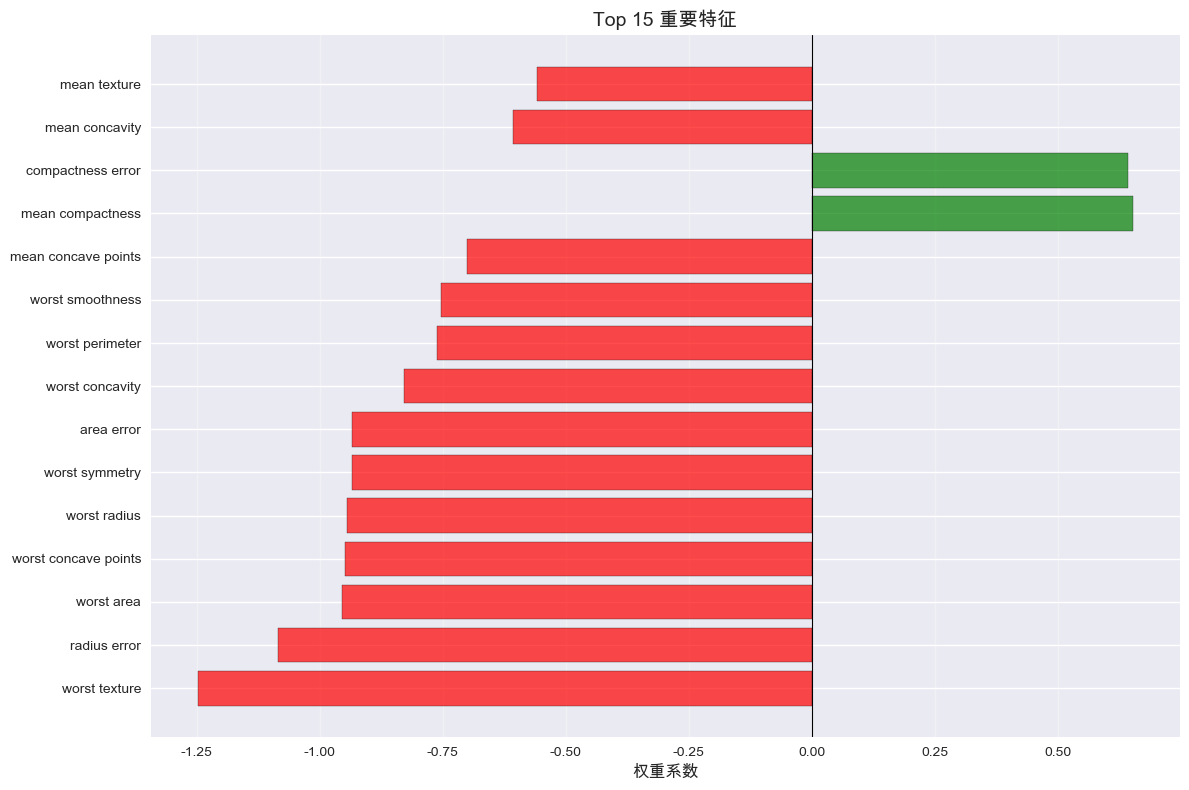


特征重要性解读:
  - 正权重(绿色): 该特征值越大，越可能是良性肿瘤
  - 负权重(红色): 该特征值越大,越可能是恶性肿瘤

最重要的5个特征:
  1. worst texture: -1.2483 (倾向恶性)
  2. radius error: -1.0843 (倾向恶性)
  3. worst area: -0.9537 (倾向恶性)
  4. worst concave points: -0.9485 (倾向恶性)
  5. worst radius: -0.9451 (倾向恶性)


In [22]:
# 获取特征重要性（权重的绝对值）
feature_importance = pd.DataFrame({
    '特征名称': cancer.feature_names,
    '权重': model_cancer.coef_[0],
    '绝对值': np.abs(model_cancer.coef_[0])
}).sort_values('绝对值', ascending=False)

# 可视化前15个重要特征
top_n = 15
plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in feature_importance['权重'].head(top_n)]
plt.barh(range(top_n), feature_importance['权重'].head(top_n), color=colors, alpha=0.7, edgecolor='black')
plt.yticks(range(top_n), feature_importance['特征名称'].head(top_n))
plt.xlabel('权重系数', fontsize=12)
plt.title(f'Top {top_n} 重要特征', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print('\n特征重要性解读:')
print('  - 正权重(绿色): 该特征值越大，越可能是良性肿瘤')
print('  - 负权重(红色): 该特征值越大,越可能是恶性肿瘤')
print(f'\n最重要的5个特征:')
for i, (idx, row) in enumerate(feature_importance.head(5).iterrows(), 1):
    direction = '良性' if row['权重'] > 0 else '恶性'
    print(f"  {i}. {row['特征名称']}: {row['权重']:.4f} (倾向{direction})")

## 8. 练习题

### 练习1: 实现Mini-batch梯度下降

修改`LogisticRegressionFromScratch`类，支持Mini-batch梯度下降。

In [ ]:
# TODO: 实现Mini-batch梯度下降的逻辑回归
class LogisticRegressionMiniBatch:
    def __init__(self, learning_rate=0.01, n_iterations=1000, batch_size=32):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        # 你的代码...
        pass
    
    def fit(self, X, y):
        # 提示：
        # 1. 每次迭代随机选择batch_size个样本
        # 2. 只用这些样本计算梯度
        # 3. 更新参数
        # 你的代码...
        pass

### 练习2: 添加L2正则化

为`LogisticRegressionFromScratch`添加L2正则化功能。

In [ ]:
# TODO: 实现带L2正则化的逻辑回归
# 提示：
# 1. 损失函数添加正则化项: J = CrossEntropy + (lambda/2n) * ||w||^2
# 2. 梯度计算添加正则化项: dw = dw + (lambda/n) * w
# 你的代码...

### 练习3: 多分类问题（One-vs-Rest）

使用完整的Iris数据集（3个类别），训练多分类逻辑回归模型。

In [ ]:
# TODO: 加载完整Iris数据集并训练多分类模型
# 提示：
# 1. LogisticRegression默认使用One-vs-Rest策略处理多分类
# 2. multi_class参数: 'ovr' (One-vs-Rest) 或 'multinomial'
# 你的代码...

# iris_full = load_iris()
# X_full = iris_full.data[:, :2]  # 使用前两个特征
# y_full = iris_full.target

## 9. 总结

### 9.1 知识点回顾

- ✅ **分类问题基础**: 理解二分类和多分类的区别
- ✅ **Sigmoid函数**: 将线性输出映射到[0,1]概率空间
- ✅ **逻辑回归原理**: 线性模型 + Sigmoid激活函数
- ✅ **交叉熵损失**: 分类问题的标准损失函数
- ✅ **梯度下降优化**: 参数更新规则
- ✅ **从零实现**: 深入理解算法细节
- ✅ **Scikit-learn**: 高效的生产级实现
- ✅ **评估指标**: Accuracy, Precision, Recall, F1-Score
- ✅ **混淆矩阵**: 详细的分类结果分析
- ✅ **决策边界可视化**: 理解模型的分类决策

---

### 9.2 逻辑回归的优缺点

**优点：**
- ✅ 简单、高效、易于理解和实现
- ✅ 输出具有概率解释
- ✅ 训练速度快，适合大规模数据
- ✅ 可扩展到多分类问题
- ✅ 特征权重可解释性强

**缺点：**
- ❌ 只能处理线性可分问题（决策边界是线性的）
- ❌ 对特征工程要求高
- ❌ 对异常值敏感
- ❌ 需要足够的数据量

---

### 9.3 何时使用逻辑回归？

✅ **适用场景：**
- 二分类或多分类问题
- 数据线性可分或接近线性可分
- 需要快速训练和预测
- 需要模型可解释性
- 需要概率输出
- 作为基线模型（Baseline）

❌ **不适用场景：**
- 数据高度非线性
- 特征之间存在复杂交互
- 需要自动特征学习

---

### 9.4 评估指标选择指南

| 场景 | 推荐指标 | 原因 |
|------|---------|------|
| 类别平衡 | Accuracy | 简单直观 |
| 类别不平衡 | F1-Score, AUC | 综合考虑两类 |
| 假阳性代价高 | Precision | 如垃圾邮件检测 |
| 假阴性代价高 | Recall | 如疾病诊断 |
| 需要概率排序 | AUC-ROC | 下一章详解 |

---

### 9.5 实践技巧

1. **特征标准化**: 特别是当特征尺度差异大时
2. **正则化**: 使用L1或L2正则化防止过拟合
3. **交叉验证**: 评估模型泛化能力
4. **阈值调整**: 根据业务需求调整分类阈值（默认0.5）
5. **特征工程**: 添加多项式特征或交互特征处理非线性问题

---

### 9.6 下一步学习

在下一个notebook中，我们将学习：

- **支持向量机(SVM)**: 处理非线性分类问题
- **核技巧(Kernel Trick)**: 隐式地将数据映射到高维空间
- **最大间隔分类器**: 更强的泛化能力
- **参数调优**: C和gamma参数的影响

---

**恭喜你完成逻辑回归的学习！继续保持！** 🎉